In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot_pole_zero(poles, zeros):

  fig, ax = plt.subplots()

  #Plotting poles.
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')
  #Plotting Zeros.
  ax.plot(np.real(zeros), np.imag(zeros), 'o', markersize=10,label='Zeros')

  #Set Plotting attributes.
  ax.axhline(0, color='black', linewidth=0.5) #draw AXis Horizontal LINE --> axhline at x=0
  ax.axvline(0, color='black',linewidth=0.5) #draw AXix Vertical LINE --> axvline at y=0
  
  ax.grid(True, which='both', linestyle='-', linewidth=0.5)
  ax.legend()

  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')
  #Plotting limits.
  ax.set_xlim([-2,2]) # in graph: -2 <= X <= 2
  ax.set_ylim([-2,2]) # in graph: -2 <= Y <= 2

  plt.show()


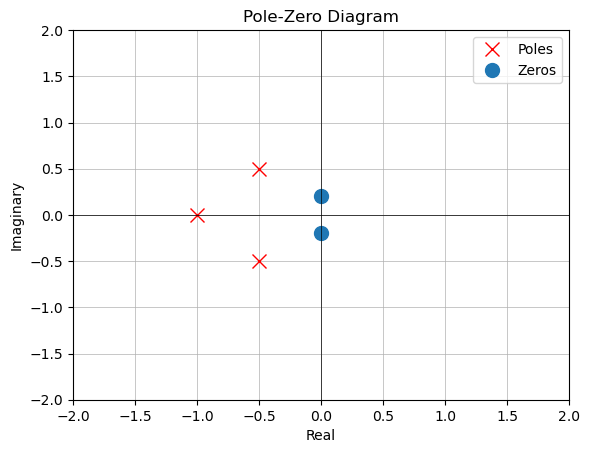

In [26]:
poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros  =[0.2j, -0.2j]

plot_pole_zero(poles, zeros)

C:\Users\PC\AppData\Local\Temp\ipykernel_17076\1322414125.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax.plot(np.real(stable_points), np.imag(stable_points), 'rx', color='blue')


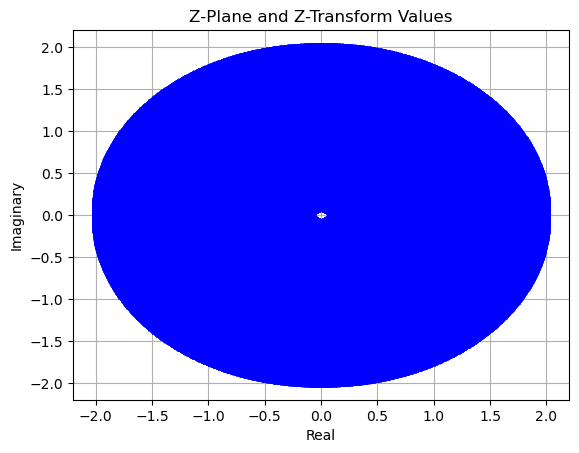

(1000000,)
Sample Z-Transformation values...
Z[0]: (54320.999999999985+0j)
Z[1]: (54304.4416938201-1337.130862624605j)
Z[2]: (54254.77704616646-2673.4382348567633j)
Z[3]: (54172.03686326917-4008.09913975455j)
Z[4]: (54056.27246742117-5340.291626954798j)
Z[5]: (53907.55566485693-6669.195285157031j)
Z[6]: (53725.97870081077-7993.991753641422j)
Z[7]: (53511.65420178297-9313.86523249971j)
Z[8]: (53264.71510505052-10628.002991258898j)
Z[9]: (52985.31457546612-11935.59587557841j)


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def Z_Transformation(signal, z_values):
    Z = np.zeros_like(z_values, dtype=complex)
    for n in range(len(signal)):
        Z += signal[n] * z_values**(-n)
    return Z

# Define the signal
signal = np.array([1, 2, 3, 4, 5])

# Define a range of z values
num_points = 1000
angles = np.linspace(0, 2 * np.pi, num_points)
radii = np.linspace(0.1, 2, num_points)

# Initialize an empty list for z_values
z_values = []

# Use nested loops to generate z_values
for r in radii:
    for angle in angles:
        z = r * np.exp(1j * angle)
        z_values.append(z)

# Convert the list to a numpy array
z_values = np.array(z_values)

# Compute the Z-Transform
Z = Z_Transformation(signal, z_values)

# Plotting the ROC (not straightforward in 2D; visualize where |Z| is finite)
fig, ax = plt.subplots()
ax.plot(np.real(z_values), np.imag(z_values), '.', markersize=1)
ax.set_title('Z-Plane and Z-Transform Values')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.grid(True)

# Identify stable points (example only)
stable_points = z_values[np.abs(Z) < 1e6]
ax.plot(np.real(stable_points), np.imag(stable_points), 'rx', color='blue')

plt.show()
print(Z.shape)
# Print Z-Transformation values for demonstration
print('Sample Z-Transformation values...')
for i, z_val in enumerate(Z[:10]):  # Print the first 10
    print(f'Z[{i}]: {z_val}')
